# Comparacion entre modelos

In [26]:
import tensorflow as tf
import numpy as np

### Cargar Modelos

In [27]:
model_hsv_128_128_3 = tf.keras.models.load_model('Modelos/HSV_128_128_3/best_model_hsv_128_128_3.keras')
model_hsv_224_224_3 = tf.keras.models.load_model('Modelos/HSV_224_224_3/best_model_hsv_224_224_3.keras')
model_rgb_128_128_3 = tf.keras.models.load_model('Modelos/Best_Model_Global.keras')
model_rgb_224_224_3 = tf.keras.models.load_model('Modelos/RGB_224_224_3/best_model_rgb_224_224_3.keras')
model_resnet50 = tf.keras.models.load_model('Modelos/ResNet50/model.keras')
mejor_model = tf.keras.models.load_model('Modelos/best_model_224_224_3.keras')

### Cargar Conjuntos de Prueba

In [28]:
X_test_hsv_128_128_3 = np.load('Modelos/HSV_128_128_3/X_test.npy')
y_test_hsv_128_128_3 = np.load('Modelos/HSV_128_128_3/y_test.npy')

In [29]:
X_test_hsv_224_224_3 = np.load('Modelos/HSV_224_224_3/X_test.npy')
y_test_hsv_224_224_3 = np.load('Modelos/HSV_224_224_3/y_test.npy')

In [30]:
X_test_rgb_128_128_3 = np.load('Modelos/RGB_128_128_3/X_test.npy')
y_test_rgb_128_128_3 = np.load('Modelos/RGB_128_128_3/y_test.npy')

In [31]:
X_test_rgb_224_224_3 = np.load('Modelos/RGB_224_224_3/X_test.npy')
y_test_rgb_224_224_3 = np.load('Modelos/RGB_224_224_3/y_test.npy')

### Summary

In [32]:
def mostrar_info_optimizador(modelo):
    """
    Muestra el tipo de optimizador, el learning rate y la configuración completa
    de un modelo Keras cargado.
    
    Parámetros:
        modelo: modelo Keras ya cargado con tf.keras.models.load_model
    """
    if modelo.optimizer is None:
        print("El modelo no tiene optimizador (puede haber sido guardado sin compilar).")
        return

    optimizador = modelo.optimizer
    print("Tipo de optimizador:", type(optimizador))
    
    # Intentar mostrar el learning rate (algunos optimizadores lo tienen como objeto)
    try:
        lr = optimizador.learning_rate
        if hasattr(lr, 'numpy'):
            print("Learning rate:", lr.numpy())
        else:
            print("Learning rate:", lr)
    except AttributeError:
        print("No se pudo acceder al learning rate.")

    print("Configuración completa del optimizador:")
    print(optimizador.get_config())


##### HSV

In [33]:
print('Modelo HSV, 128x128x3')
print(mostrar_info_optimizador(model_hsv_128_128_3))
model_hsv_128_128_3.summary()

Modelo HSV, 128x128x3
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 0.001
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,491,677 (5.69 MB)

 Trainable params: 496,905 (1.90 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 993,812 (3.79 MB)

In [34]:
print('Modelo HSV, 224x224x3')
print(mostrar_info_optimizador(model_hsv_224_224_3))
model_hsv_224_224_3.summary()

Modelo HSV, 224x224x3
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 0.0005
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 0.0005000000237487257, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,597 (1.36 MB)

 Trainable params: 119,049 (465.04 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 238,100 (930.08 KB)

##### RGB

In [35]:
print('Modelo ResNet50, 128x128x3')
print(mostrar_info_optimizador(model_resnet50))
model_resnet50.summary()

Modelo ResNet50, 128x128x3
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 1e-04
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 9.999999747378752e-05, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 23,643,037 (90.19 MB)

 Trainable params: 18,441 (72.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 36,884 (144.08 KB)

In [36]:
print('Modelo RGB, 128x128x3')
print(mostrar_info_optimizador(model_rgb_128_128_3))
model_rgb_128_128_3.summary()

Modelo RGB, 128x128x3
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 0.0005
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 0.0005000000237487257, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 63, 63, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 30, 30, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,597 (1.36 MB)

 Trainable params: 119,049 (465.04 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 238,100 (930.08 KB)

In [37]:
print('Modelo HSV, 128x128x3')
print(mostrar_info_optimizador(model_rgb_224_224_3))
model_rgb_224_224_3.summary()


Modelo HSV, 128x128x3
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 0.0005
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 0.0005000000237487257, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,597 (1.36 MB)

 Trainable params: 119,049 (465.04 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 238,100 (930.08 KB)

In [38]:
print("Mejor modelo")
print(mostrar_info_optimizador(mejor_model))
mejor_model.summary()

Mejor modelo
Tipo de optimizador: <class 'keras.src.optimizers.adam.Adam'>
Learning rate: 0.0005
Configuración completa del optimizador:
{'name': 'adam', 'learning_rate': 0.0005000000237487257, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 112, 112, 32)   │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 56, 56, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 28, 28, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,597 (1.36 MB)

 Trainable params: 119,049 (465.04 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 238,100 (930.08 KB)

### Matriz de Confusión

In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu modelo entrenado y datos de prueba
# X_test, y_test (one-hot o etiquetas)
# model: tu CNN ya entrenada
def plot_confusion_matrix(model, X_test, y_test, title='Confusion Matrix'):
    # Si y_test está en one-hot encoding, conviértelo a etiquetas
    y_true = np.argmax(y_test, axis=1)

    # Obtener predicciones del modelo
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Crear matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Mostrar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

##### HSV

110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step


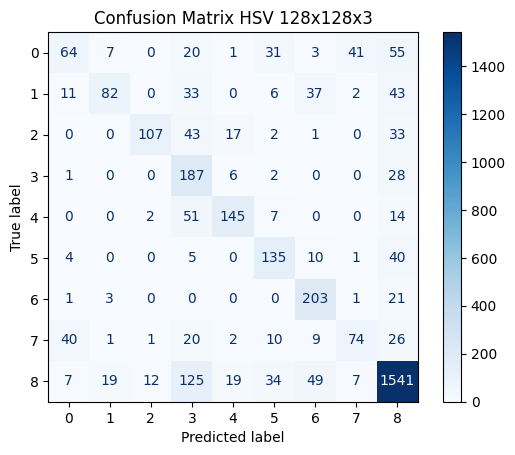

In [40]:
plot_confusion_matrix(model_hsv_128_128_3, X_test_hsv_128_128_3, y_test_hsv_128_128_3, title='Confusion Matrix HSV 128x128x3')


110/110 ━━━━━━━━━━━━━━━━━━━━ 33s 291ms/step


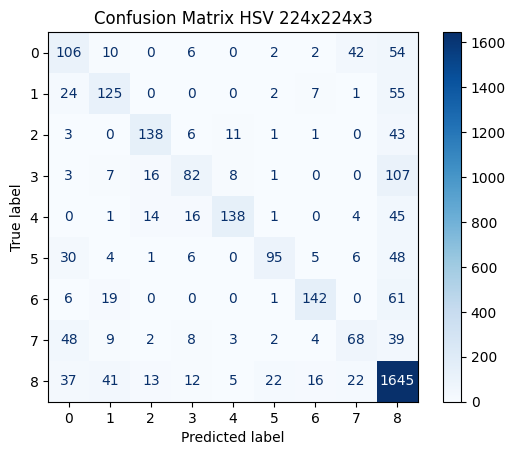

In [41]:
plot_confusion_matrix(model_hsv_224_224_3, X_test_hsv_224_224_3, y_test_hsv_224_224_3, title='Confusion Matrix HSV 224x224x3')

##### RGB

110/110 ━━━━━━━━━━━━━━━━━━━━ 57s 492ms/step


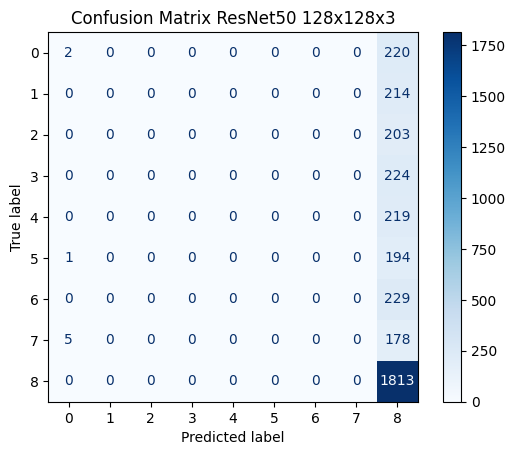

In [42]:
plot_confusion_matrix(model_resnet50, X_test_rgb_128_128_3, y_test_rgb_128_128_3, title='Confusion Matrix ResNet50 128x128x3')

110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step


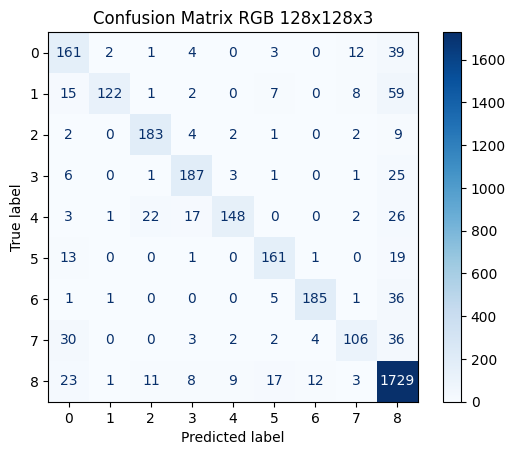

In [43]:
plot_confusion_matrix(model_rgb_128_128_3, X_test_rgb_128_128_3, y_test_rgb_128_128_3, title='Confusion Matrix RGB 128x128x3')


110/110 ━━━━━━━━━━━━━━━━━━━━ 35s 312ms/step


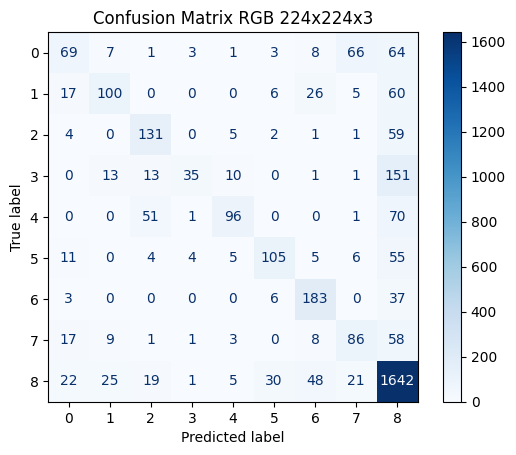

In [44]:
plot_confusion_matrix(model_rgb_224_224_3, X_test_rgb_224_224_3, y_test_rgb_224_224_3, title='Confusion Matrix RGB 224x224x3')

##### Mejor

110/110 ━━━━━━━━━━━━━━━━━━━━ 36s 328ms/step


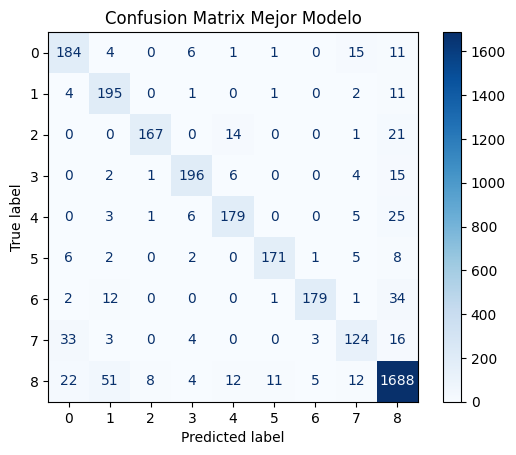

In [45]:
plot_confusion_matrix(mejor_model, X_test_rgb_224_224_3, y_test_rgb_224_224_3, title='Confusion Matrix Mejor Modelo')

### Evaluación del Modelo

In [46]:
from sklearn.metrics import classification_report
import numpy as np

def evaluar(model, X_test, y_test, title='Evaluación del Modelo'):
    print(title)
    
    # Evaluación con Keras
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Pérdida (loss): {loss:.4f}')
    print(f'Precisión (accuracy): {accuracy*100:.2f}%')
    
    # Predicciones
    y_pred_probs = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Reporte de métricas
    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred, digits=4))

##### HSV

In [47]:
evaluar(model_hsv_128_128_3, X_test_hsv_128_128_3, y_test_hsv_128_128_3, title='HSV 128x128x3')


HSV 128x128x3
Pérdida (loss): 0.9981
Precisión (accuracy): 72.47%

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.5000    0.2883    0.3657       222
           1     0.7321    0.3832    0.5031       214
           2     0.8770    0.5271    0.6585       203
           3     0.3864    0.8348    0.5282       224
           4     0.7632    0.6621    0.7090       219
           5     0.5947    0.6923    0.6398       195
           6     0.6506    0.8865    0.7505       229
           7     0.5873    0.4044    0.4790       183
           8     0.8556    0.8500    0.8528      1813

    accuracy                         0.7247      3502
   macro avg     0.6608    0.6143    0.6096      3502
weighted avg     0.7490    0.7247    0.7214      3502



In [48]:
evaluar(model_hsv_224_224_3, X_test_hsv_224_224_3, y_test_hsv_224_224_3, title='HSV 224x224x3')

HSV 224x224x3
Pérdida (loss): 0.9520
Precisión (accuracy): 72.50%

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.4125    0.4775    0.4426       222
           1     0.5787    0.5841    0.5814       214
           2     0.7500    0.6798    0.7132       203
           3     0.6029    0.3661    0.4556       224
           4     0.8364    0.6301    0.7188       219
           5     0.7480    0.4872    0.5901       195
           6     0.8023    0.6201    0.6995       229
           7     0.4755    0.3716    0.4172       183
           8     0.7845    0.9073    0.8414      1813

    accuracy                         0.7250      3502
   macro avg     0.6656    0.5693    0.6066      3502
weighted avg     0.7209    0.7250    0.7150      3502



##### RGB

In [49]:
evaluar(model_resnet50, X_test_rgb_128_128_3, y_test_rgb_128_128_3, title='Confusion Matrix ResNet50 128x128x3')

Confusion Matrix ResNet50 128x128x3
Pérdida (loss): 1.6354
Precisión (accuracy): 51.83%

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.2500    0.0090    0.0174       222
           1     0.0000    0.0000    0.0000       214
           2     0.0000    0.0000    0.0000       203
           3     0.0000    0.0000    0.0000       224
           4     0.0000    0.0000    0.0000       219
           5     0.0000    0.0000    0.0000       195
           6     0.0000    0.0000    0.0000       229
           7     0.0000    0.0000    0.0000       183
           8     0.5189    1.0000    0.6832      1813

    accuracy                         0.5183      3502
   macro avg     0.0854    0.1121    0.0778      3502
weighted avg     0.2845    0.5183    0.3548      3502



c:\Users\abiab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\abiab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\abiab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [50]:
evaluar(model_rgb_128_128_3, X_test_rgb_128_128_3, y_test_rgb_128_128_3, title='RGB 128x128x3')

RGB 128x128x3
Pérdida (loss): 0.7831
Precisión (accuracy): 85.15%

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.6339    0.7252    0.6765       222
           1     0.9606    0.5701    0.7155       214
           2     0.8356    0.9015    0.8673       203
           3     0.8274    0.8348    0.8311       224
           4     0.9024    0.6758    0.7728       219
           5     0.8173    0.8256    0.8214       195
           6     0.9158    0.8079    0.8585       229
           7     0.7852    0.5792    0.6667       183
           8     0.8741    0.9537    0.9122      1813

    accuracy                         0.8515      3502
   macro avg     0.8392    0.7638    0.7913      3502
weighted avg     0.8556    0.8515    0.8473      3502



In [51]:
evaluar(model_rgb_224_224_3, X_test_rgb_224_224_3, y_test_rgb_224_224_3, title='RGB 224x224x3')

RGB 224x224x3
Pérdida (loss): 0.9938
Precisión (accuracy): 69.87%

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.4825    0.3108    0.3781       222
           1     0.6494    0.4673    0.5435       214
           2     0.5955    0.6453    0.6194       203
           3     0.7778    0.1562    0.2602       224
           4     0.7680    0.4384    0.5581       219
           5     0.6908    0.5385    0.6052       195
           6     0.6536    0.7991    0.7191       229
           7     0.4599    0.4699    0.4649       183
           8     0.7477    0.9057    0.8192      1813

    accuracy                         0.6987      3502
   macro avg     0.6472    0.5257    0.5520      3502
weighted avg     0.6949    0.6987    0.6737      3502



##### Mejor

In [52]:
evaluar(mejor_model, X_test_rgb_224_224_3, y_test_rgb_224_224_3, title='Mejor Modelo')

Mejor Modelo
Pérdida (loss): 0.5523
Precisión (accuracy): 88.04%

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.7331    0.8288    0.7780       222
           1     0.7169    0.9112    0.8025       214
           2     0.9435    0.8227    0.8789       203
           3     0.8950    0.8750    0.8849       224
           4     0.8443    0.8174    0.8306       219
           5     0.9243    0.8769    0.9000       195
           6     0.9521    0.7817    0.8585       229
           7     0.7337    0.6776    0.7045       183
           8     0.9229    0.9311    0.9270      1813

    accuracy                         0.8804      3502
   macro avg     0.8518    0.8358    0.8406      3502
weighted avg     0.8849    0.8804    0.8808      3502

